In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import random
import torch
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [24]:
#dimenion
d = 20
#initialize
xinitial = torch.rand(d,1)*6-3
#kernel sigma
sigma=2

# print(xinitial)
# print(xinitial.var())

In [25]:
def targetfunc(x,B):
    return (x-B)**2-10*torch.cos(2*np.pi*(x-B))+10

In [26]:
#Rastrigin function
def L(x, d, B, C):
    sum=torch.sum((x-B)**2-10*torch.cos(2*np.pi*(x-B))+10)/d+C
    return sum

def dL(x, d, B):
    delta=(2.*(x-B)+10.*torch.sin(2.*np.pi*(x-B))*2*np.pi)/d
    delta=delta/torch.norm(delta)
    return delta

In [27]:
def kernel(x,sigma):
    return torch.exp(-(x-x.t())**2/(2*sigma))

In [28]:
def dL_kernel(x, d, B, sigma):
    delta=torch.mm(kernel(x,sigma),(2*(x-B)+10*torch.sin(2*np.pi*(x-B))*2*np.pi)/d)/d
    delta=delta/torch.norm(delta)
    return delta

In [30]:
#gd
def gd(xinitial, B, C, step_num, dt):
    L_step = [0 for n in range(step_num)]
    x_step = xinitial
    L_step[0] = L(xinitial, d, B, C)
    traj_x=xinitial
    for step in range(step_num - 1):
        x_step_new=x_step-dt*dL(x_step,d,B)
        L_step[step + 1] = L(x_step_new, d, B, C)
        x_step = x_step_new
        traj_x=torch.cat((traj_x,x_step),1)
        #print(L_step[step])
    return L_step, x_step,traj_x

#gd with kernal
def gd_kernel(xinitial, B, C, step_num, dt, sigma):
    L_step = [0 for n in range(step_num)]
    x_step = xinitial
    L_step[0] = L(xinitial, d, B, C)
    traj_x=xinitial
    for step in range(step_num - 1):
        x_step_new = x_step-dt*dL_kernel(x_step, d, B, sigma)
        L_step[step + 1] = L(x_step_new, d, B, C)
        x_step = x_step_new
        traj_x=torch.cat((traj_x,x_step),1)
    return L_step, x_step,traj_x

In [31]:
dt = 0.005
B = 0
C = 0
step_num = 10000
L_step, x_final,traj_x = gd(xinitial, B, C, step_num, dt)
print(torch.mean(x_final))
L_step_kernel, x_final_kernel,traj_x_kernel = gd_kernel(xinitial, B, C, step_num, dt, sigma)
print(torch.mean(x_final_kernel))

tensor(0.1494)
tensor(-0.1007)


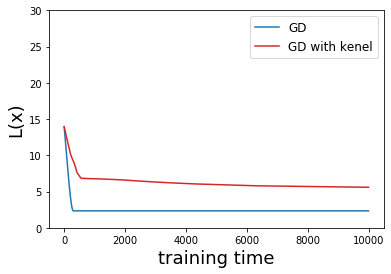

In [32]:
#plot gd history and gd_kenel history
fig, ax1 = plt.subplots()
ax1.set_ylabel("L(x)", fontsize=18)
ax1.set_xlabel("training time", fontsize=18)
ax1.plot(L_step, label="GD")
ax1.plot(L_step_kernel, label="GD with kenel",color = colors[3])
ax1.legend(fontsize=12)
ax1.set_ylim(0,30)
plt.show()

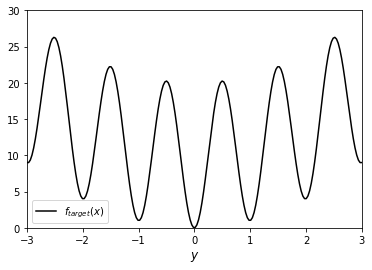

In [33]:

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$y$", fontsize=12)
ax1.set_xlim(-3,3)
ax1.set_ylim(0,30)
xs = torch.linspace(-3,3,200).reshape(200,1)
ax1.plot(xs.numpy(), targetfunc(xs,B).numpy(), "k", label=r"$f_{target}(x)$")
# x_time=traj_x[:,4000]
# ax1.scatter(x_time.numpy(), targetfunc(x_time,B).numpy())
plt.legend()
    
